<a href="https://colab.research.google.com/github/lahari2197/ML/blob/main/Sqeezenet_cataract_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install keras

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive(4)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/archive(4)/preprocessed_images/4377_right.jpg
/content/drive/MyDrive/archive(4)/preprocessed_images/4355_left.jpg
/content/drive/MyDrive/archive(4)/preprocessed_images/4347_right.jpg
/content/drive/MyDrive/archive(4)/preprocessed_images/4304_right.jpg
/content/drive/MyDrive/archive(4)/preprocessed_images/4368_right.jpg
/content/drive/MyDrive/archive(4)/preprocessed_images/4458_left.jpg
/content/drive/MyDrive/archive(4)/preprocessed_images/436_right.jpg
/content/drive/MyDrive/archive(4)/preprocessed_images/43_left.jpg
/content/drive/MyDrive/archive(4)/preprocessed_images/4431_left.jpg
/content/drive/MyDrive/archive(4)/preprocessed_images/437_right.jpg
/content/drive/MyDrive/archive(4)/preprocessed_images/4295_right.jpg
/content/drive/MyDrive/archive(4)/preprocessed_images/441_right.jpg
/content/drive/MyDrive/archive(4)/preprocessed_images/4330_left.jpg
/content/drive/MyDrive/archive(4)/preprocessed_images/4309_lef

In [ ]:
import numpy as np # array manipulation
import pandas as pd
from tqdm import tqdm
import keras # deep learning
from PIL import Image # Image processing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/archive(4)/full_df.csv")

In [ ]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [ ]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [ ]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [ ]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [ ]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


In [ ]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [ ]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/content/drive/MyDrive/archive(4)/preprocessed_images"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue

        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [ ]:
dataset = create_dataset(cataract,1)

100%|██████████| 594/594 [00:14<00:00, 40.92it/s] 


In [ ]:
len(dataset)

588

In [ ]:
dataset = create_dataset(normal,0)

100%|██████████| 500/500 [00:03<00:00, 162.61it/s]


In [ ]:
len(dataset)

1088

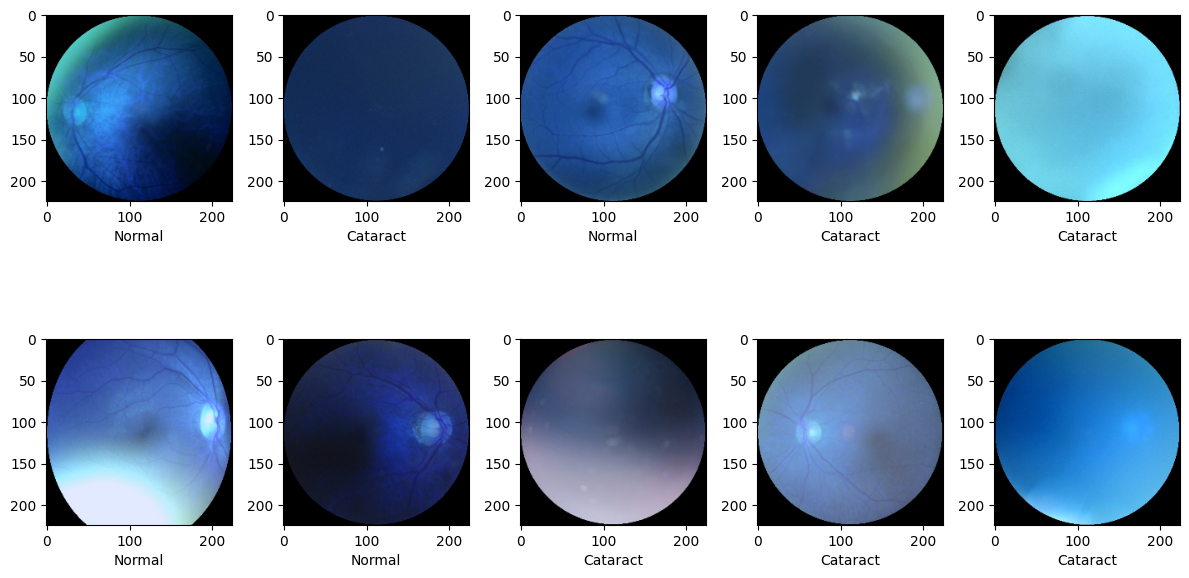

In [ ]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()

In [ ]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import SqueezeNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Replace 'num_classes' with the number of classes in your specific task
num_classes = 2

# Assuming you have your input data in 'x_train' and 'x_test' arrays with shape (num_samples, 224, 224, 3)
# Resize the input data to the correct shape (224, 224, 3)
x_train_resized = tf.image.resize(x_train, (224, 224))
x_test_resized = tf.image.resize(x_test, (224, 224))

# Convert target labels to one-hot encoded format
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)

# Create the SqueezeNet model without the top (classification) layers
squeezenet_base = SqueezeNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top
x = GlobalAveragePooling2D()(squeezenet_base.output)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=squeezenet_base.input, outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
history = model.fit(x_train_resized, y_train_onehot, batch_size=16, epochs=30, validation_data=(x_test_resized, y_test_onehot),
                    verbose=1)


Epoch 1/30
55/55 [==============================] - ETA: 0s - loss: 0.4104 - accuracy: 0.8598

55/55 [==============================] - 339s 2s/step - loss: 0.4104 - accuracy: 0.8598 - val_loss: 76355704.0000 - val_accuracy: 0.4771
Epoch 2/30
55/55 [==============================] - ETA: 0s - loss: 0.2431 - accuracy: 0.9115

55/55 [==============================] - 94s 2s/step - loss: 0.2431 - accuracy: 0.9115 - val_loss: 614.3772 - val_accuracy: 0.5229
Epoch 3/30
55/55 [==============================] - ETA: 0s - loss: 0.2031 - accuracy: 0.9368

55/55 [==============================] - 98s 2s/step - loss: 0.2031 - accuracy: 0.9368 - val_loss: 7504.5659 - val_accuracy: 0.5229
Epoch 4/30
55/55 [==============================] - ETA: 0s - loss: 0.2007 - accuracy: 0.9379

55/55 [==============================] - 94s 2s/step - loss: 0.2007 - accuracy: 0.9379 - val_loss: 101325.8750 - val_accuracy: 0.5229
Epoch 5/30
55/55 [==============================] - ETA: 0s - loss: 0.1725 - accuracy: 0.9253

55/55 [==============================] - 94s 2s/step - loss: 0.1725 - accuracy: 0.9253 - val_loss: 3465503.7500 - val_accuracy: 0.5229
Epoch 6/30
55/55 [==============================] - ETA: 0s - loss: 0.1259 - accuracy: 0.9563

55/55 [==============================] - 98s 2s/step - loss: 0.1259 - accuracy: 0.9563 - val_loss: 44914.1016 - val_accuracy: 0.5229
Epoch 7/30
55/55 [==============================] - ETA: 0s - loss: 0.1455 - accuracy: 0.9494

55/55 [==============================] - 98s 2s/step - loss: 0.1455 - accuracy: 0.9494 - val_loss: 21165.6738 - val_accuracy: 0.4771
Epoch 8/30
55/55 [==============================] - ETA: 0s - loss: 0.1627 - accuracy: 0.9448

55/55 [==============================] - 94s 2s/step - loss: 0.1627 - accuracy: 0.9448 - val_loss: 26183.7793 - val_accuracy: 0.4771
Epoch 9/30
55/55 [==============================] - ETA: 0s - loss: 0.0855 - accuracy: 0.9690

55/55 [==============================] - 98s 2s/step - loss: 0.0855 - accuracy: 0.9690 - val_loss: 351876.4375 - val_accuracy: 0.4771
Epoch 10/30
55/55 [==============================] - ETA: 0s - loss: 0.1223 - accuracy: 0.9575

55/55 [==============================] - 94s 2s/step - loss: 0.1223 - accuracy: 0.9575 - val_loss: 1527277.5000 - val_accuracy: 0.5229
Epoch 11/30
55/55 [==============================] - ETA: 0s - loss: 0.1338 - accuracy: 0.9575

55/55 [==============================] - 98s 2s/step - loss: 0.1338 - accuracy: 0.9575 - val_loss: 30184904.0000 - val_accuracy: 0.5229
Epoch 12/30
55/55 [==============================] - ETA: 0s - loss: 0.0871 - accuracy: 0.9655

55/55 [==============================] - 93s 2s/step - loss: 0.0871 - accuracy: 0.9655 - val_loss: 1329681.3750 - val_accuracy: 0.5229
Epoch 13/30
55/55 [==============================] - ETA: 0s - loss: 0.0751 - accuracy: 0.9770

55/55 [==============================] - 93s 2s/step - loss: 0.0751 - accuracy: 0.9770 - val_loss: 4878779.5000 - val_accuracy: 0.5229
Epoch 14/30
55/55 [==============================] - ETA: 0s - loss: 0.0765 - accuracy: 0.9701

55/55 [==============================] - 94s 2s/step - loss: 0.0765 - accuracy: 0.9701 - val_loss: 51435.0195 - val_accuracy: 0.4771
Epoch 15/30
55/55 [==============================] - ETA: 0s - loss: 0.0652 - accuracy: 0.9782

55/55 [==============================] - 93s 2s/step - loss: 0.0652 - accuracy: 0.9782 - val_loss: 75872.8203 - val_accuracy: 0.5229
Epoch 16/30
55/55 [==============================] - ETA: 0s - loss: 0.1849 - accuracy: 0.9379

55/55 [==============================] - 98s 2s/step - loss: 0.1849 - accuracy: 0.9379 - val_loss: 6703743.5000 - val_accuracy: 0.6972
Epoch 17/30
55/55 [==============================] - ETA: 0s - loss: 0.1455 - accuracy: 0.9448

55/55 [==============================] - 98s 2s/step - loss: 0.1455 - accuracy: 0.9448 - val_loss: 23911890944.0000 - val_accuracy: 0.4771
Epoch 18/30
55/55 [==============================] - ETA: 0s - loss: 0.0922 - accuracy: 0.9667

55/55 [==============================] - 95s 2s/step - loss: 0.0922 - accuracy: 0.9667 - val_loss: 6815672320.0000 - val_accuracy: 0.4771
Epoch 19/30
55/55 [==============================] - ETA: 0s - loss: 0.0784 - accuracy: 0.9713

55/55 [==============================] - 94s 2s/step - loss: 0.0784 - accuracy: 0.9713 - val_loss: 122562664.0000 - val_accuracy: 0.5229
Epoch 20/30
55/55 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.9828

55/55 [==============================] - 93s 2s/step - loss: 0.0409 - accuracy: 0.9828 - val_loss: 188028624.0000 - val_accuracy: 0.5229
Epoch 21/30
55/55 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 0.9805

55/55 [==============================] - 94s 2s/step - loss: 0.0750 - accuracy: 0.9805 - val_loss: 45399.1016 - val_accuracy: 0.5229
Epoch 22/30
55/55 [==============================] - ETA: 0s - loss: 0.0452 - accuracy: 0.9862

55/55 [==============================] - 93s 2s/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 11639.5469 - val_accuracy: 0.4037
Epoch 23/30
55/55 [==============================] - ETA: 0s - loss: 0.0666 - accuracy: 0.9793

55/55 [==============================] - 93s 2s/step - loss: 0.0666 - accuracy: 0.9793 - val_loss: 7142.0298 - val_accuracy: 0.4771
Epoch 24/30
55/55 [==============================] - ETA: 0s - loss: 0.0395 - accuracy: 0.9828

55/55 [==============================] - 98s 2s/step - loss: 0.0395 - accuracy: 0.9828 - val_loss: 662841.2500 - val_accuracy: 0.5229
Epoch 25/30
55/55 [==============================] - ETA: 0s - loss: 0.0770 - accuracy: 0.9770

55/55 [==============================] - 93s 2s/step - loss: 0.0770 - accuracy: 0.9770 - val_loss: 7481.6113 - val_accuracy: 0.5229
Epoch 26/30
55/55 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9874

55/55 [==============================] - 98s 2s/step - loss: 0.0366 - accuracy: 0.9874 - val_loss: 8207.5352 - val_accuracy: 0.5183
Epoch 27/30
55/55 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0.9966

55/55 [==============================] - 98s 2s/step - loss: 0.0146 - accuracy: 0.9966 - val_loss: 9667.3076 - val_accuracy: 0.5275
Epoch 28/30
55/55 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.9977

55/55 [==============================] - 98s 2s/step - loss: 0.0096 - accuracy: 0.9977 - val_loss: 524.5607 - val_accuracy: 0.4862
Epoch 29/30
55/55 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.9966

55/55 [==============================] - 93s 2s/step - loss: 0.0079 - accuracy: 0.9966 - val_loss: 19237.1328 - val_accuracy: 0.4771
Epoch 30/30
55/55 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.9954

55/55 [==============================] - 98s 2s/step - loss: 0.0096 - accuracy: 0.9954 - val_loss: 38005.4023 - val_accuracy: 0.4771


In [ ]:
loss,Accuracy= model.evaluate(x_test,y_test)
print("loss", loss)
print("Accuracy", Accuracy)

7/7 [==============================] - 0s 23ms/step - loss: 0.6804 - accuracy: 0.5459
loss 0.6803710460662842
Accuracy 0.5458715558052063
